In [1]:
from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

import tensorflow as tf
from PIL import Image
import numpy as np

from matplotlib import pyplot as plt
import cv2
from model.config import cfg
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
from data.aircraft_data import aircraft_classes

In [19]:
assert cfg.current_dataset == 'aircraft'

In [6]:
from model.bilinear_cnn import bilinear_cnn
fine_tune_dir = cfg.finetune_dir

input_placeholder = tf.placeholder(tf.float32, shape=[None, 448, 448, 3])
result_tensor = bilinear_cnn(input_placeholder, is_training=False, fine_tuning=False, num_class=cfg.num_classes)

sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint(fine_tune_dir))

INFO:tensorflow:Restoring parameters from /data/aircraft_finetune/model.ckpt-31297


In [7]:
from glob import glob
test_imgs = sorted(glob("pictures/*.jpg"))

In [8]:
def get_processed_img(img_path):
    img_pil = Image.open(img_path)
    width, height = img_pil.size
    img_cropped = img_pil.crop((0,0,width,height-20))
    imgresized = img_cropped.resize((448, 448), Image.ANTIALIAS)
    return imgresized

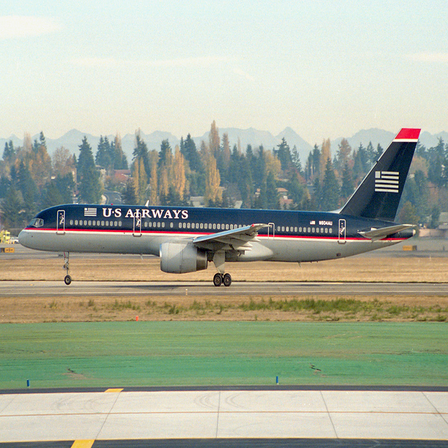

In [9]:
img0 = get_processed_img(test_imgs[0])
img0

In [10]:
weights_value = 'fc-layer/fully_connected/weights:0'
fc_weights = sess.run(weights_value)
conv5_3_tensor = tf.get_default_graph().get_tensor_by_name("conv5_3:0")

In [12]:
def infer_image(sess, imgnd):
    imgnd = np.expand_dims(imgnd, 0)
    result, conv5_3 = sess.run([result_tensor, conv5_3_tensor], feed_dict={input_placeholder:imgnd})
    pred = np.argmax(result, axis=-1)
    return pred, conv5_3

In [14]:
def draw_heatmap(img):
    resized_img = img.resize((448, 448), Image.ANTIALIAS)
    pred, conv5_3 = infer_image(sess, np.array(resized_img).astype(np.float32))
    class_name = aircraft_classes[pred[0]]
    weights_for_pred = fc_weights[:, pred]
    
    activation_map1 = conv5_3[...,26][0]
    activation_map2 = conv5_3[...,27][0]

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,20))
    axes[0].set_title("activation 1")
    axes[0].imshow(cv2.resize(activation_map1, (448, 448)), cmap="jet")
    axes[0].imshow(img.resize((448, 448), Image.ANTIALIAS), alpha=0.5)

    axes[1].set_title("activation 2")
    axes[1].imshow(cv2.resize(activation_map2, (448,448)), cmap="jet")
    axes[1].imshow(img.resize((448, 448), Image.ANTIALIAS), alpha=0.5)

    axes[2].imshow(img.resize((448, 448), Image.ANTIALIAS))
    axes[2].set_title(class_name)

## The conv5_3 visualization result

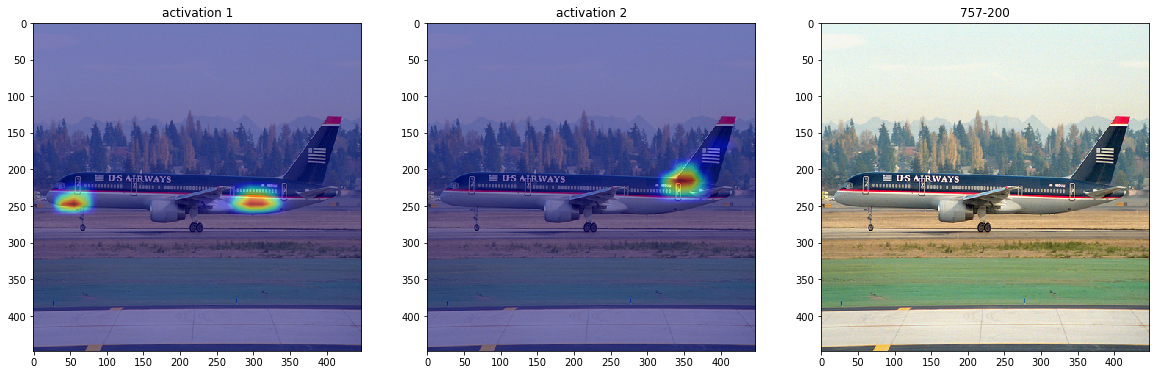

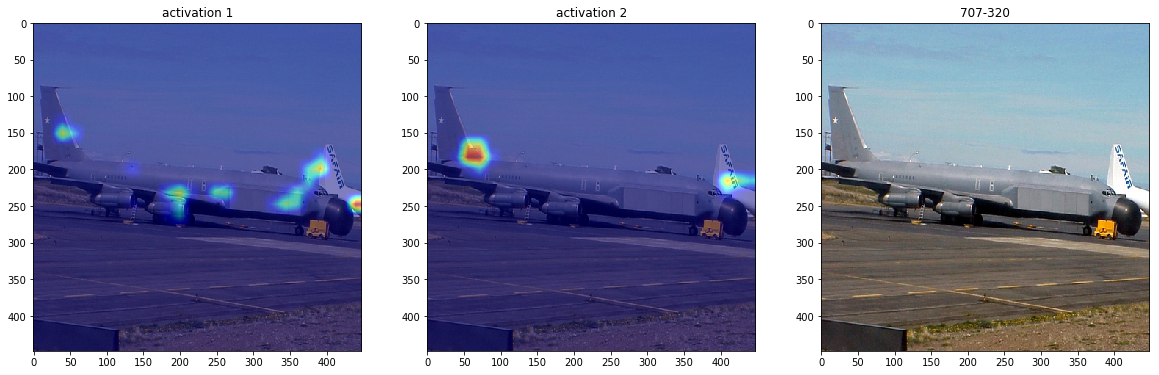

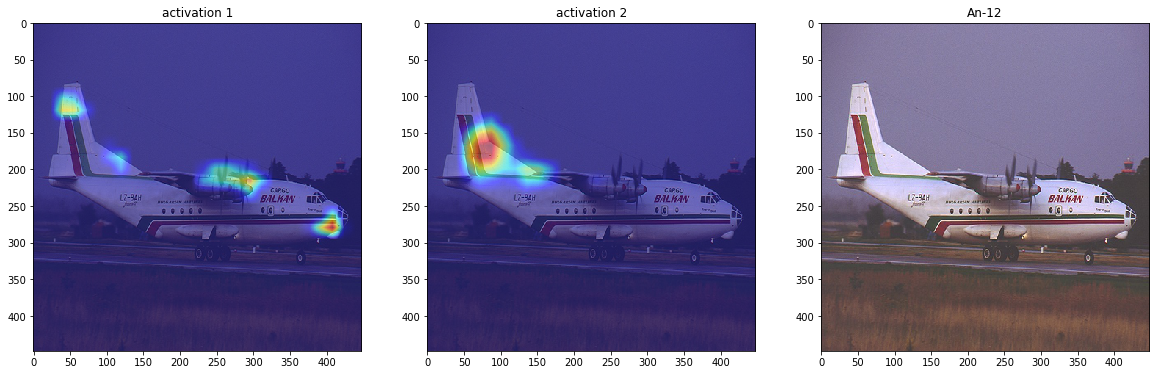

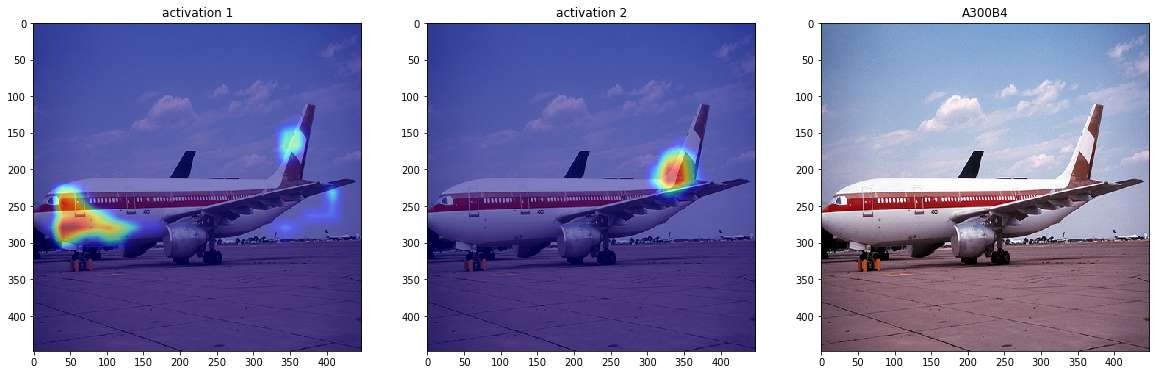

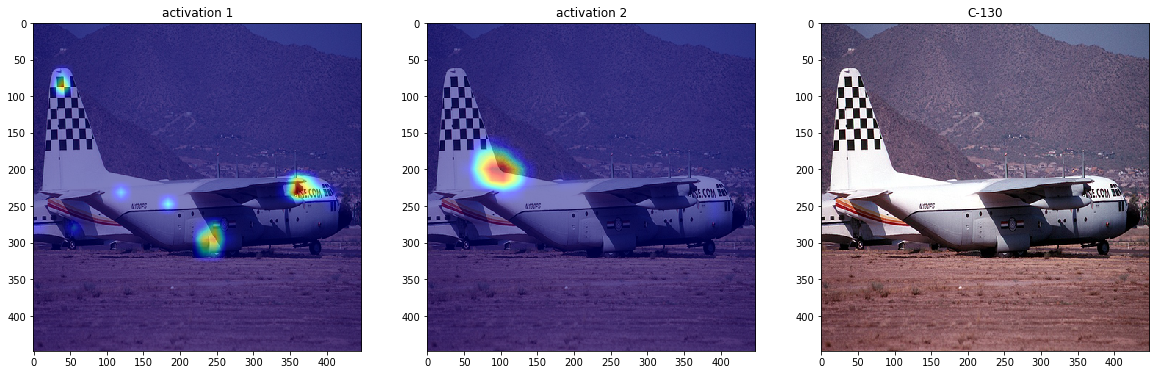

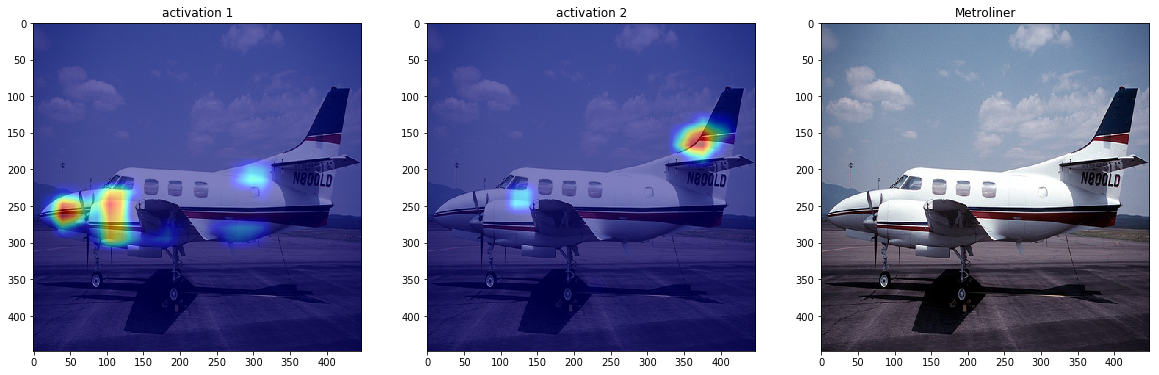

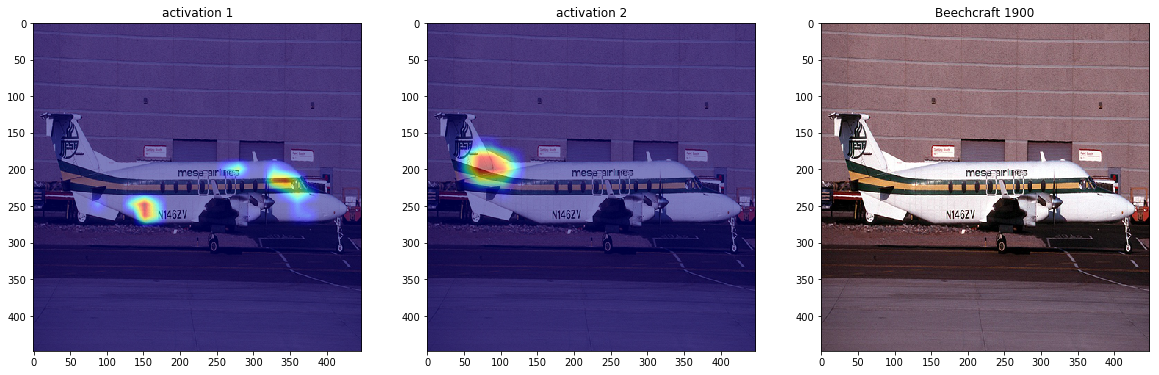

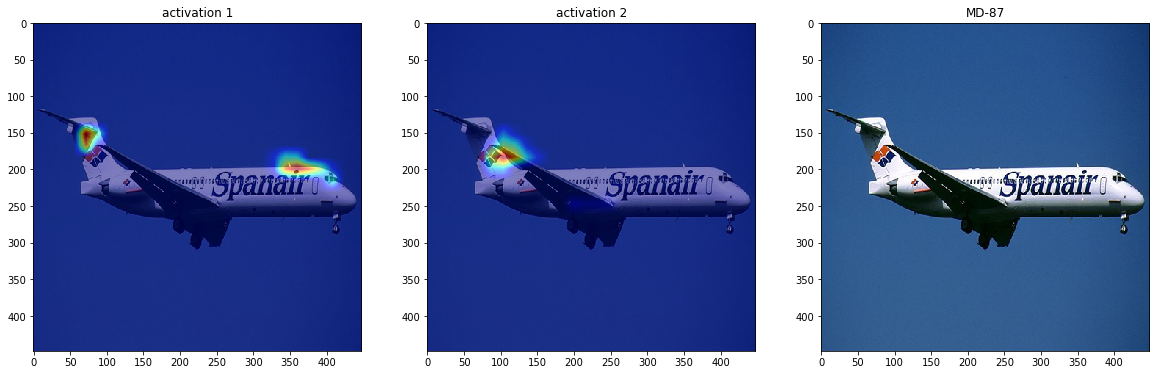

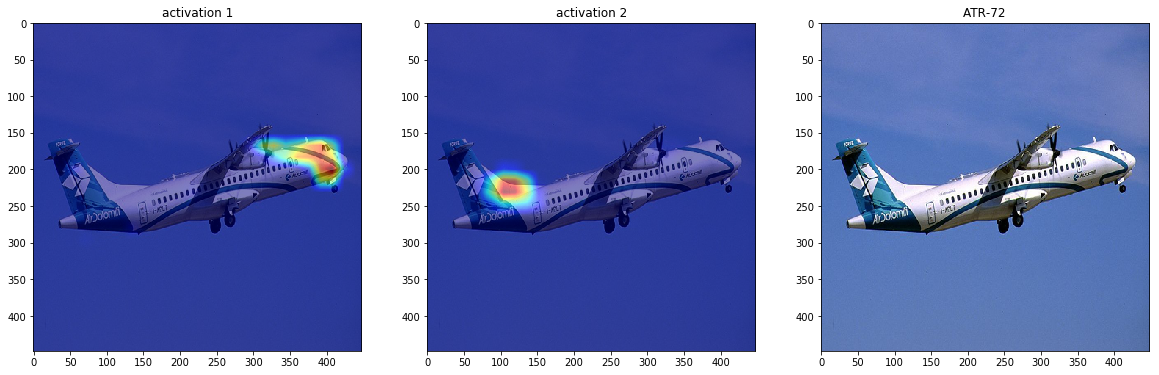

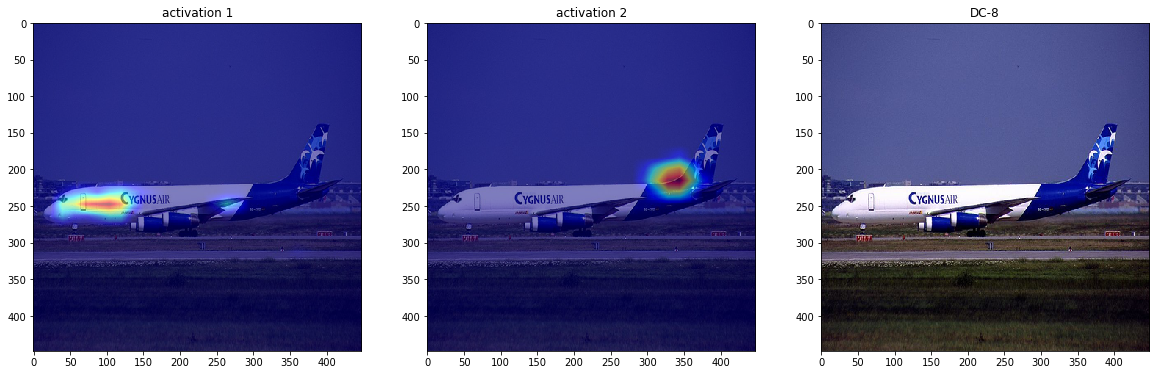

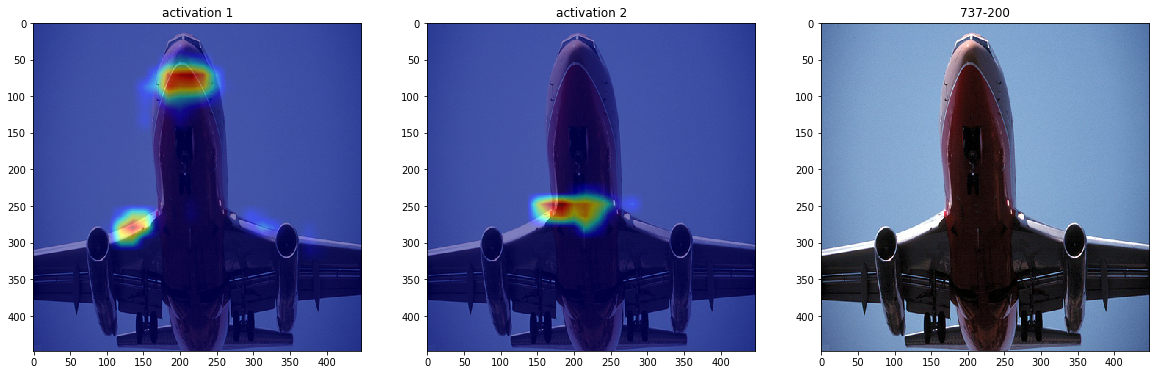

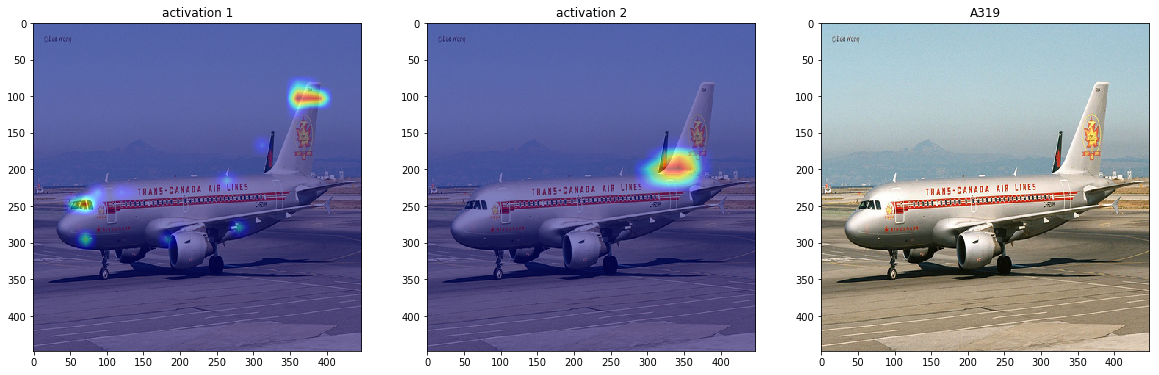

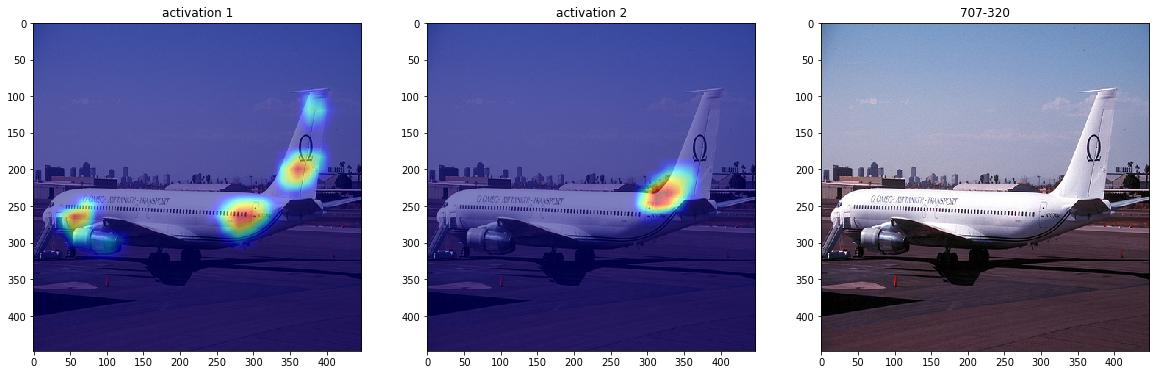

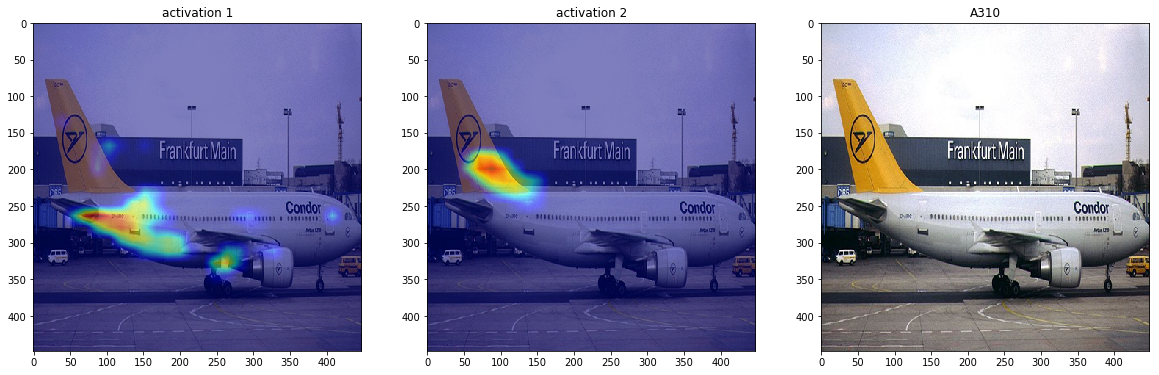

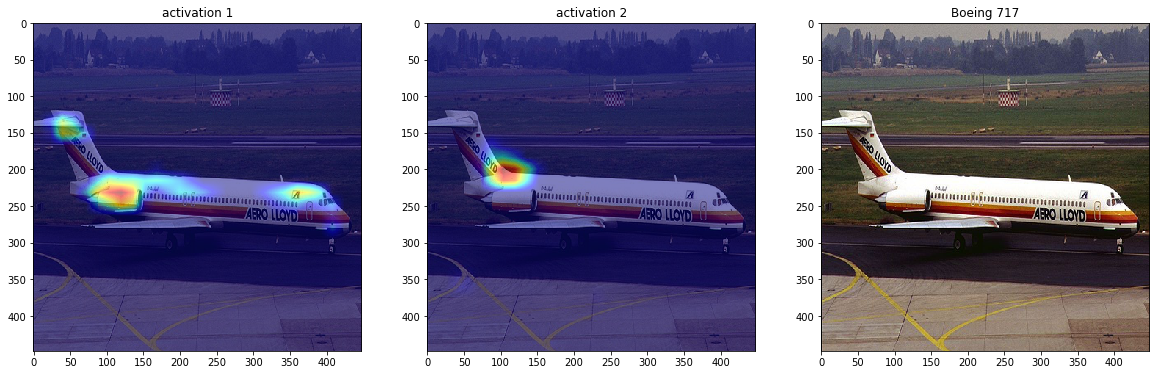

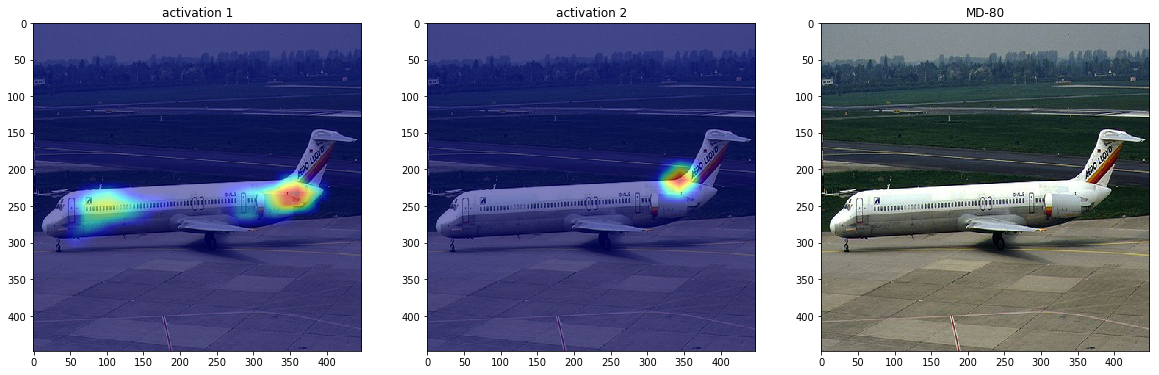

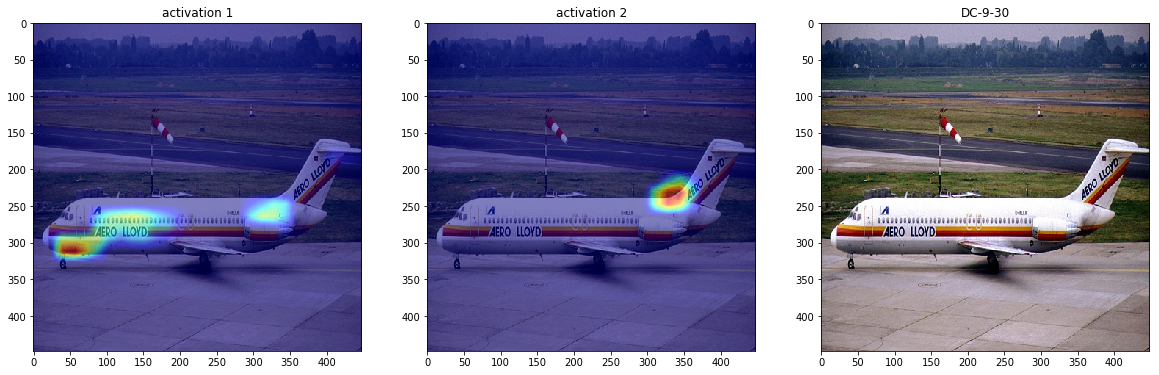

In [15]:
for img in test_imgs:
    draw_heatmap(get_processed_img(img))

In [12]:
def draw_heatmap_v2(img):
    resized_img = img.resize((448, 448), Image.ANTIALIAS)
    pred, conv5_3, z_value = bcnn.detail_info(sess, np.array(resized_img).astype(np.float32))
    class_name = aircraft_classes[pred[0]]
    weights_for_pred = fc_weights[:, pred]
    
    activation_map1 = conv5_3[...,489][0]
    activation_map2 = conv5_3[...,46][0]

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,20))
    axes[0].set_title("activation 1")
    axes[0].imshow(cv2.resize(activation_map1, (448, 448)), cmap="jet")
    axes[0].imshow(img.resize((448, 448), Image.ANTIALIAS), alpha=0.5)

    axes[1].set_title("activation 2")
    axes[1].imshow(cv2.resize(activation_map2, (448,448)), cmap="jet")
    axes[1].imshow(img.resize((448, 448), Image.ANTIALIAS), alpha=0.5)

    axes[2].imshow(img.resize((448, 448), Image.ANTIALIAS))
    axes[2].set_title(class_name)

In [ ]:
for img in test_imgs:
    draw_heatmap_v2(get_processed_img(img))